#### We use the generalized Fibonacci bargraphs from generalized Fibonacci words:



Enter the value of p (maximum digit):  5

Enter the maximum desired length of the Fibonacci words (n):  4


Generated p-generalized Fibonacci words and their bargraphs:

Length 1: 5


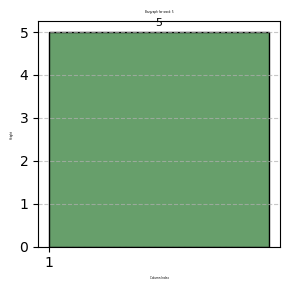


Length 2: 55, 54


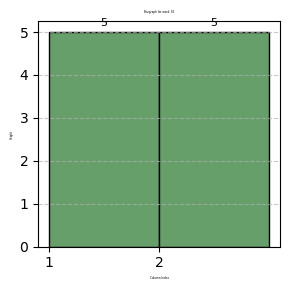

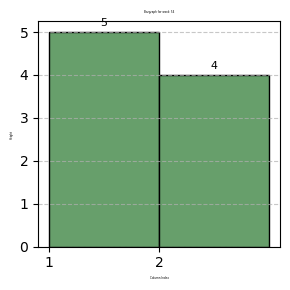


Length 3: 555, 554, 543, 545


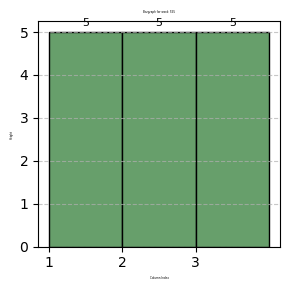

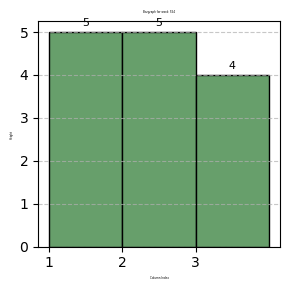

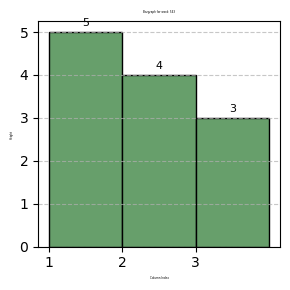

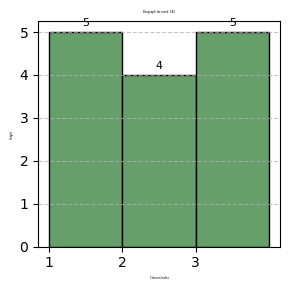


Length 4: 5555, 5554, 5543, 5545, 5432, 5435, 5455, 5454


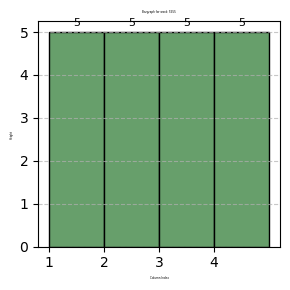

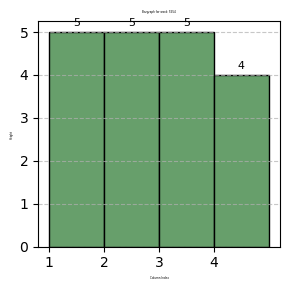

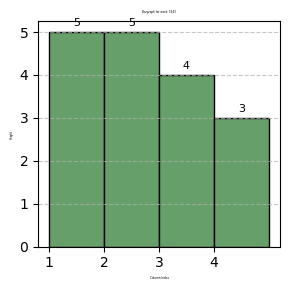

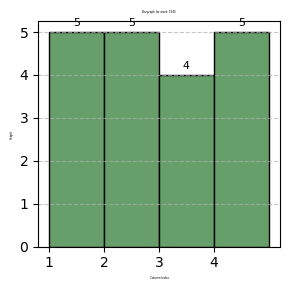

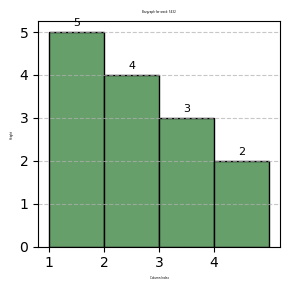

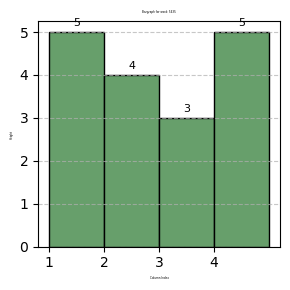

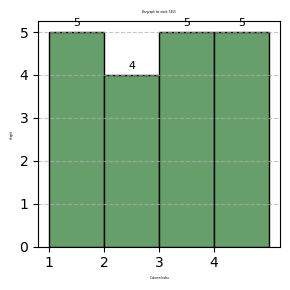

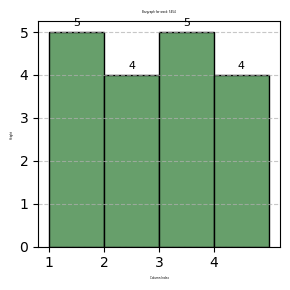

In [10]:
import matplotlib.pyplot as plt

def generate_p_fibonacci_words(p, n):

    table = {}

    p = int(p)  # Ensure k is an integer

    # Generate words of length from 1 to n
    for length in range(1, n + 1):
        words = []

        def backtrack(word):
            if len(word) == length:
                words.append(word)  # Append the generated word
                return

            if len(word) == 0:
                # Start with the first possible character, which is str(k)
                candidates = [str(p)]
            else:
                last_char = int(word[-1])
                if last_char == p:
                    candidates = [str(p), str(p- 1)]
                elif last_char == 1:
                    candidates = [str(p)]
                else:
                    candidates = [str(last_char - 1), str(p)]

            # Recursively generate all possible words
            for c in candidates:
                backtrack(word + c)

        # Start backtracking from an empty word for the current length
        backtrack('')
        table[length] = words

    return table

def plot_bargraph(word):

    heights = [int(char) for char in word]  # Convert each character to an integer height
    columns = list(range(len(heights)))  # Column indices

    # Create the bargraph using matplotlib with reduced figure size
    fig, ax = plt.subplots(figsize=(3, 3))  # Adjusted figure size
    bar_width = 1  # Set the width of the bars
    bars = ax.bar(columns, heights, width=bar_width, color='#679F6B', edgecolor='black', align='edge')

    # Adding value labels on top of the bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, int(yval), ha='center', va='bottom', fontsize=8)

    # Set plot details with adjusted font sizes
    ax.set_xlabel("Column Index", fontsize=2)
    ax.set_ylabel("Height", fontsize=2)
    ax.set_title(f"Bargraph for word: {word}", fontsize=2)
    ax.set_xticks(columns)
    ax.set_xticklabels([str(i + 1) for i in columns])
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Ask for user input
p = int(input("Enter the value of p (maximum digit): "))
n = int(input("Enter the maximum desired length of the Fibonacci words (n): "))

# Generate the table of words
table = generate_p_fibonacci_words(p, n)

# Print the results in a formatted table view
print("\nGenerated p-generalized Fibonacci words and their bargraphs:")
for length, words in table.items():
    print(f"\nLength {length}: {', '.join(words)}")
    # Plot bargraphs for each word of the current length
    for word in words:
        plot_bargraph(word)
